In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/font_manager.py:229: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


In [2]:
fname = "HorseHead.fits"
hdu_list = fits.open(fname)
hdu_list.info()

Filename: HorseHead.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     161   (891, 893)   int16   
  1  er.mask       1 TableHDU        25   1600R x 4C   [F6.2, F6.2, F6.2, F6.2]   


In [3]:
image_data = hdu_list[0].data

In [4]:
print(type(image_data))
print(image_data.shape)

<class 'numpy.ndarray'>
(893, 891)


In [5]:
hdu_list.close()

In [6]:
image_data= fits.getdata(fname)
print(type(image_data))
print(image_data.shape)

<class 'numpy.ndarray'>
(893, 891)


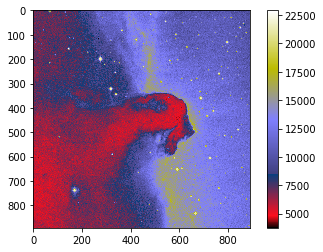

In [23]:
plt.imshow(image_data, cmap='gist_stern')
plt.colorbar()

In [24]:
print('Min:', np.min(image_data))
print('Max:', np.max(image_data))
print('Mean:', np.mean(image_data))
print('stdev:', np.std(image_data))

Min: 3759
Max: 22918
Mean: 9831.481676287574
stdev: 3032.3927542049046


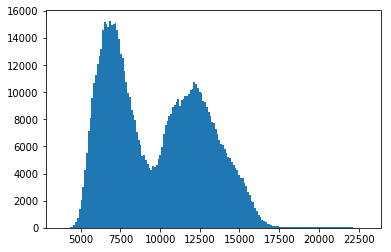

In [25]:
histogram = plt.hist(image_data.flatten(), bins = 'auto')

In [26]:
from matplotlib.colors import LogNorm

[Text(1, 0, '5,000'), Text(1, 0, '10,000'), Text(1, 0, '20,000')]

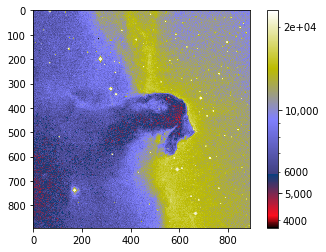

In [36]:
plt.imshow(image_data, cmap='gist_stern', norm=LogNorm())

cbar = plt.colorbar(ticks=[5.e3,1.e4,5.e4])
cbar.ax.set_yticklabels(["5,000","10,000","20,000"])

In [38]:
image_list = ['M13_blue_0001.fits','M13_blue_0002.fits','M13_blue_0003.fits','M13_blue_0004.fits','M13_blue_0005.fits']

In [39]:
image_concat = [fits.getdata(image) for image in image_list]

In [41]:
final_image = np.sum(image_concat, axis = 0)

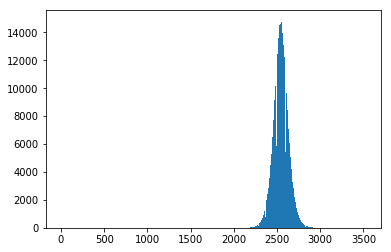

In [43]:
image_hist = plt.hist(final_image.flatten(), bins='auto')

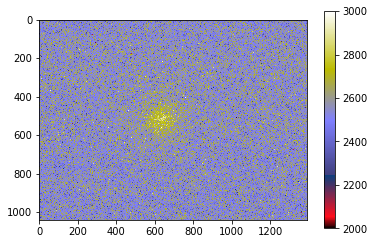

In [59]:
plt.imshow(final_image, cmap='gist_stern', vmin=2E3, vmax=3E3)
plt.colorbar()

In [49]:
outfile = 'stacked _m13_blue.fits'
hdu = fits.PrimaryHDU(final_image)
hdu.writeto(outfile, overwrite=True)